In [3]:
#Dependency API 
#!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import LSTM, Dense,Input,Dropout
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 Index ETF
tickerSymbol = '^GSPC'  # This is the symbol for the S&P 500 index itself

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2025-1-16')



In [3]:
# Print the data
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.0,0.0
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.0,0.0
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.0,0.0
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.0,0.0
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.0,0.0


In [4]:
#removes dates as index
tickerDf= tickerDf.reset_index()
tickerDf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.0,0.0
1,2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.0,0.0
2,2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.0,0.0
3,2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.0,0.0
4,2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.0,0.0
...,...,...,...,...,...,...,...,...
3778,2025-01-08 00:00:00-05:00,5910.660156,5927.890137,5874.779785,5918.250000,4441740000,0.0,0.0
3779,2025-01-10 00:00:00-05:00,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,0.0,0.0
3780,2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,0.0,0.0
3781,2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,0.0,0.0


In [5]:
# Convert 'Date' to datetime and remove the time component
tickerDf['Date'] = pd.to_datetime(tickerDf['Date']).dt.date

# Select only the required columns
tickerDf = tickerDf[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [6]:
tickerDf




,Date,Open,High,Low,Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000
...,...,...,...,...,...,...
3778,2025-01-08,5910.660156,5927.890137,5874.779785,5918.250000,4441740000
3779,2025-01-10,5890.350098,5890.350098,5807.779785,5827.040039,4751930000
3780,2025-01-13,5782.020020,5838.609863,5773.310059,5836.220215,4421200000
3781,2025-01-14,5859.270020,5871.919922,5805.419922,5842.910156,4142280000


In [7]:
#Moving Average

In [8]:
# Calculate the 100-day moving average of the 'Close' column
tickerDf.loc[:, 'MA100'] = tickerDf['Close'].rolling(window=100).mean()

/var/folders/2z/rf048pq10ds294ss8jcnxmxc0000gn/T/ipykernel_5329/594716916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDf.loc[:, 'MA100'] = tickerDf['Close'].rolling(window=100).mean()


In [9]:
tickerDf

,Date,Open,High,Low,Close,Volume,MA100
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,NaN
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,NaN
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,NaN
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,NaN
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,NaN
...,...,...,...,...,...,...,...
3778,2025-01-08,5910.660156,5927.890137,5874.779785,5918.250000,4441740000,5817.505376
3779,2025-01-10,5890.350098,5890.350098,5807.779785,5827.040039,4751930000,5820.233276
3780,2025-01-13,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,5822.512979
3781,2025-01-14,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,5824.970879


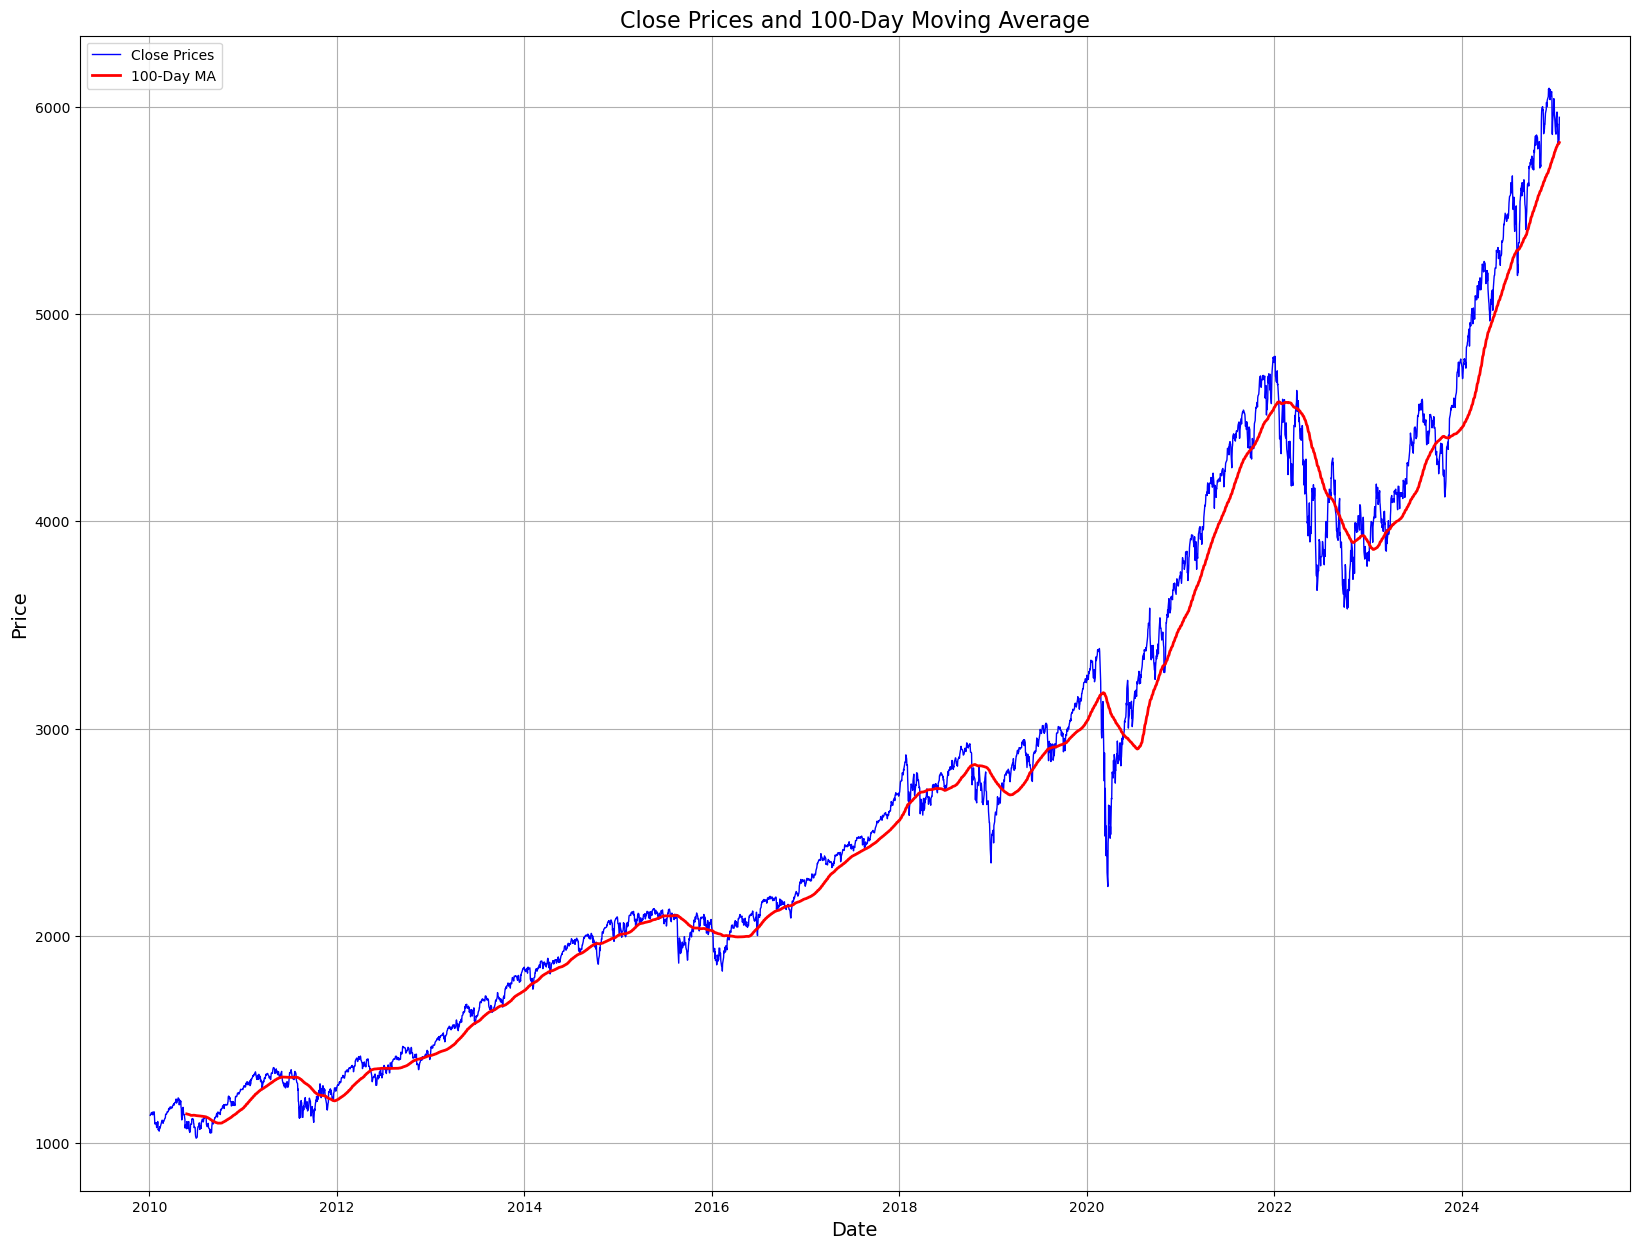

In [10]:
# Plotting the Close prices and the moving average
plt.figure(figsize=(20, 15))  # Adjust the figure size to better fit the data
plt.plot(tickerDf['Date'], tickerDf['Close'], label='Close Prices', color='blue', linewidth=1)
plt.plot(tickerDf['Date'], tickerDf['MA100'], label='100-Day MA', color='red', linewidth=2)

# Adding plot title and labels
plt.title('Close Prices and 100-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adding legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [11]:
# Calculate the 200-day moving average of the 'Close' column
tickerDf.loc[:, 'MA200'] = tickerDf['Close'].rolling(window=200).mean()

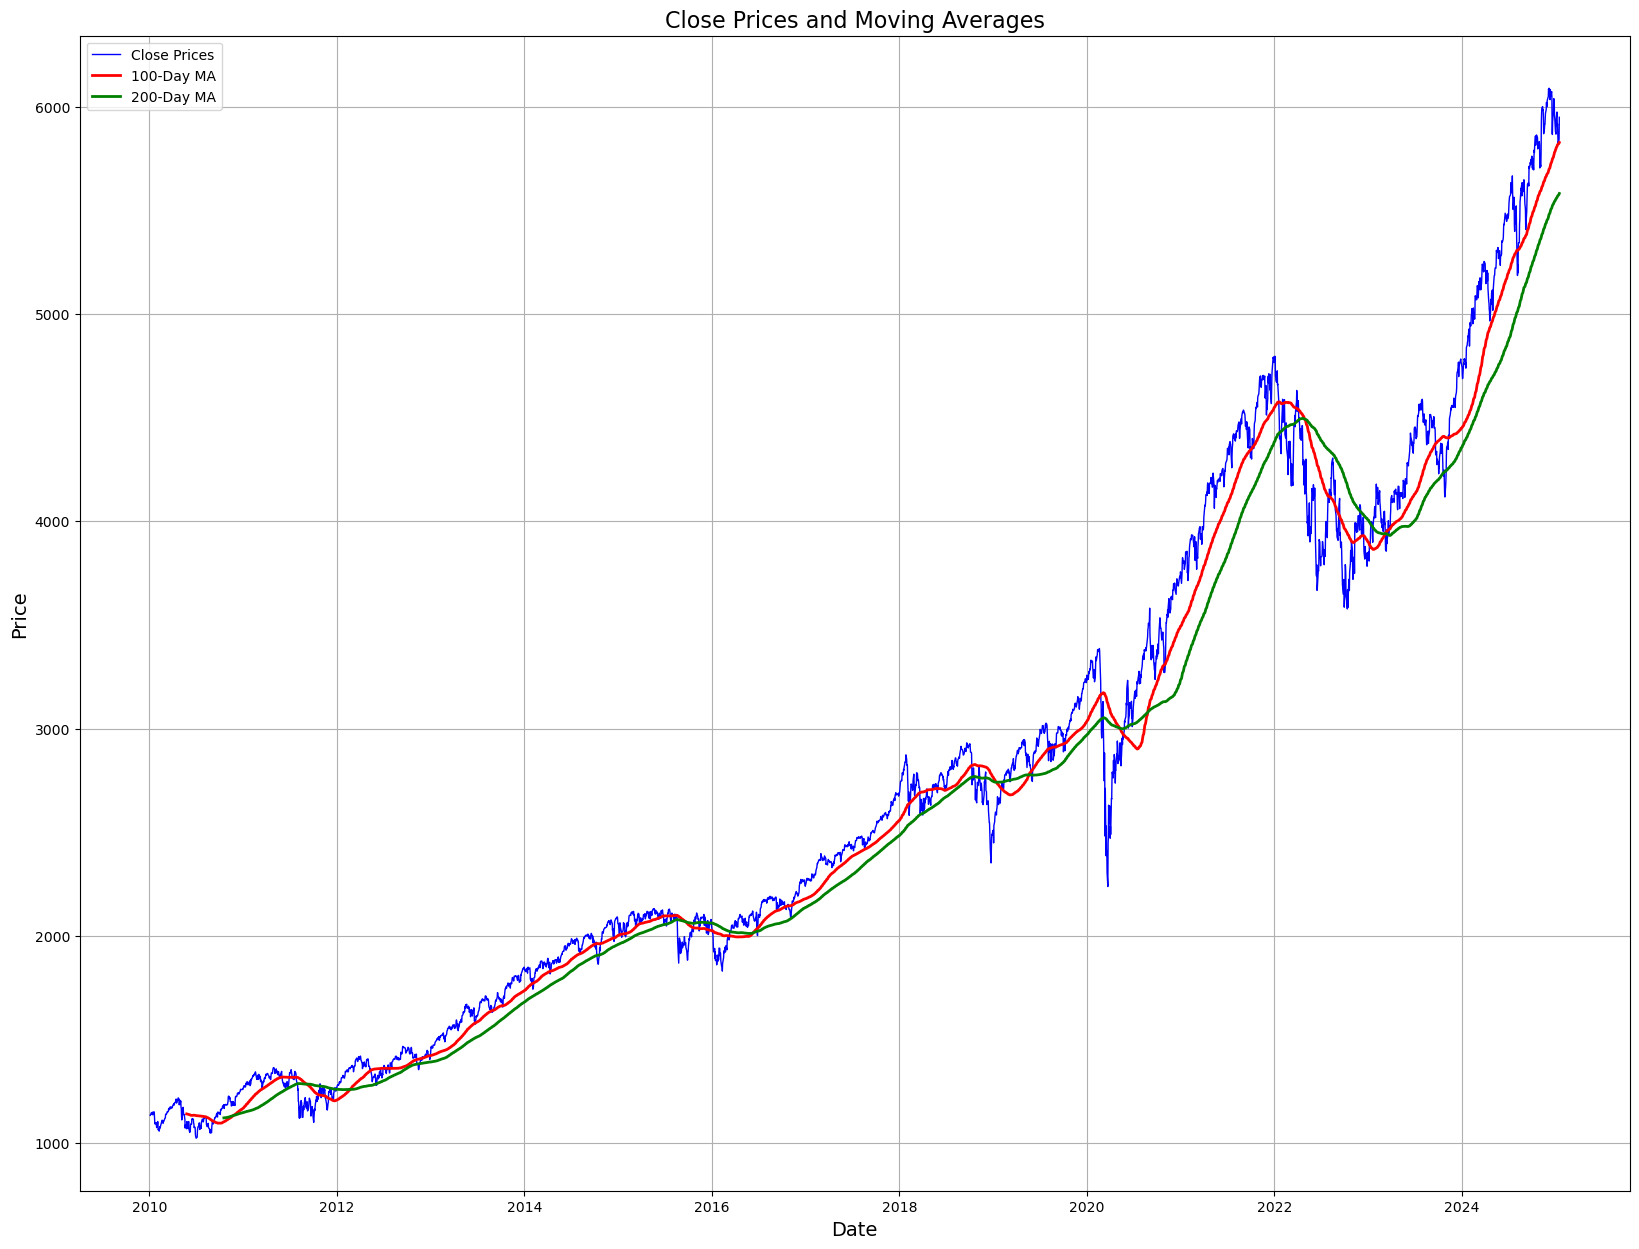

In [12]:
# Plotting the Close prices and the moving averages
plt.figure(figsize=(20,15))  # Adjust the figure size to better fit the data
plt.plot(tickerDf['Date'], tickerDf['Close'], label='Close Prices', color='blue', linewidth=1)
plt.plot(tickerDf['Date'], tickerDf['MA100'], label='100-Day MA', color='red', linewidth=2)
plt.plot(tickerDf['Date'], tickerDf['MA200'], label='200-Day MA', color='green', linewidth=2)

# Adding plot title and labels
plt.title('Close Prices and Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adding legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [13]:
# Get the 'Close' column
close_prices = tickerDf['Close']

# Calculate the split index
split_index = int(len(close_prices) * 0.7)
# Split the data into training and testing sets, then rename them
data_training = close_prices[:split_index]
data_testing = close_prices[split_index:]

# Display the shape of the training and testing data to verify the renaming and split
print(f'Training data shape: {data_training.shape}')
print(f'Testing data shape: {data_testing.shape}')


Training data shape: (2648,)
Testing data shape: (1135,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_training_scaled = scaler.fit_transform(np.array(data_training).reshape(-1, 1))
data_testing_scaled = scaler.transform(np.array(data_testing).reshape(-1, 1))

In [15]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(data_training_scaled, time_step)
X_test, y_test = create_dataset(data_testing_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(60, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(80, activation='relu', return_sequences=True),
    Dropout(0.4),
    LSTM(120, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

/Users/rahulchettri/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- [ ] We initially started using LSTM model for our project , 
- [ ] We will be using closing price for training the model for now reason being …
- [ ] We will be using 70% of data to train the model and 30% for the testing purposes…
- [ ] Firstly we applied min max scaling to normalize the stock price data within range 0-1 , this helps to improve the efficiency of the LSTM model and prevents bias toward large numerical values 
- [ ] Next, we reshape the training and testing datasets to fit the LSTM input format 
- [ ] And then  we used sliding window approach with a time step of 100 this means the model looks at the past 100 time steps to predict the next stock price 
- [ ] The model consists of four LSTM layers each with an increasing number of neurons (50,60,80,120) to extract complex patterns from stock price movements.
- [ ] Each LSTM layer has a dropout layer to reduce overfitting 



In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - loss: 0.1132 - val_loss: 0.4291
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - loss: 0.0116 - val_loss: 0.1491
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - loss: 0.0085 - val_loss: 0.0314
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 0.0078 - val_loss: 0.0207
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - loss: 0.0076 - val_loss: 0.0208
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - loss: 0.0063 - val_loss: 0.0146
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 0.0051 - val_loss: 0.0488
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - loss: 0.0060 - val_loss: 0.0554
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - loss: 0.0050 - val_loss: 0.0405
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - loss: 0.0050 - val_loss: 0.0474
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 0.0059 - val_loss: 0.0219
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/ste

In [19]:
model.save('ML_model.h5')

###### data_testing.head()

In [20]:
data_training.tail()

2643    3179.719971
2644    3145.320068
2645    3169.939941
2646    3152.050049
2647    3185.040039
Name: Close, dtype: float64

In [21]:
# Extract the last 100 days from the training data
past_100_days = data_training.tail(100)

# Append it to the beginning of the data_testing series
full_test_data = pd.concat([past_100_days, data_testing], axis=0)

In [22]:
full_test_data

2548    3386.149902
2549    3373.229980
2550    3337.750000
2551    3225.889893
2552    3128.209961
           ...     
3778    5918.250000
3779    5827.040039
3780    5836.220215
3781    5842.910156
3782    5949.910156
Name: Close, Length: 1235, dtype: float64

In [23]:
input_data= scaler.fit_transform(np.array(full_test_data).reshape(-1, 1))
input_data

array([[0.29815435],
       [0.29480103],
       [0.28559232],
       ...,
       [0.93406219],
       [0.93579855],
       [0.96357005]])

In [24]:
input_data.shape

(1235, 1)

In [25]:
x_test = []
y_test = []
for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [26]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1135, 100, 1)
(1135,)


In [27]:
#making prediction 
y_predicted = model.predict(x_test)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [28]:


# Assuming 'scaler' was used to scale the 'full_test_data'
y_predicted_original = scaler.inverse_transform(y_predicted)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [30]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original, y_predicted_original)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 38996.55076558328
Root Mean Squared Error: 197.47544344951672


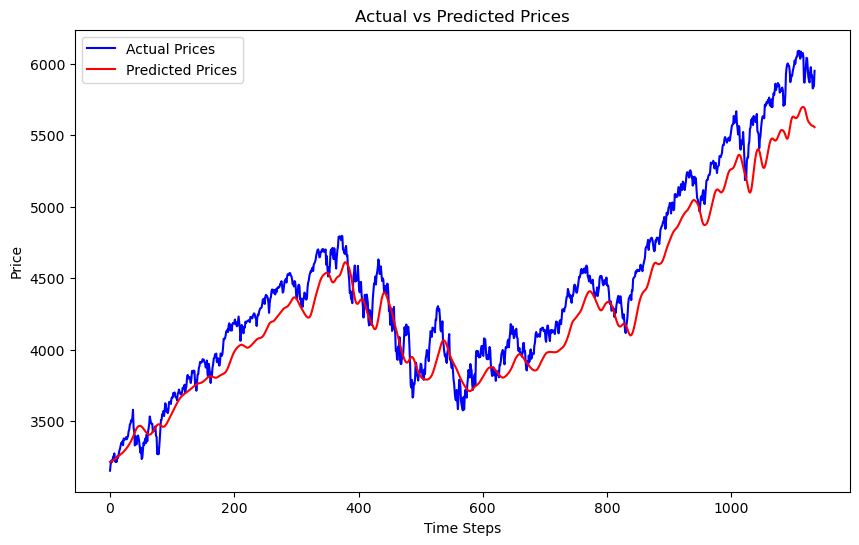

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Prices', color='blue')
plt.plot(y_predicted_original, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()


There seems to be a slight lag in the predicted values relative to the actual values. This is a common issue with many predictive models, especially in time series forecasting, as the model might inherently react to past values to make predictions.

To address the lag issue in your LSTM model predictions for time series data, let’s try implementing a few of the strategies I mentioned. We'll focus on refining the model's architecture and optimizing input features and sequence length. This involves adjusting the current setup to possibly increase responsiveness to new data.

Strategy: Shortening the Input Sequence Length
By reducing the number of time steps in each input sequence, you can make the model more responsive to recent changes, which might help minimize the lag. Let’s adjust the sequence length and see its effect:

In [42]:
import numpy as np

# Convert actual and predicted prices into movement direction (1 = up, -1 = down, 0 = no change)
actual_movement = np.sign(np.diff(y_test_original.flatten()))
predicted_movement = np.sign(np.diff(y_predicted_original.flatten()))

# Compute the percentage of correct trend predictions
trend_success = np.mean(actual_movement == predicted_movement) * 100

print(f"Trend Success Percentage: {trend_success:.2f}%")


Trend Success Percentage: 52.29%


- [ ] For training the LSTM model , we used the Adam optimizer which is an adaptive learning rate optimization algorithm that is well suited for time series problems 
- [ ] The loss function chosen is Mean Squared Error (MSE) as it effectively measures the difference between predicted and actual stocks 
- [ ] The plot here compares actual stock price that is blue vs predicted stock prices red over time 
- [ ] The trend success percentage indicates how often the model correctly predicts the direction up or down movement of stock price 
- [ ] We achieve 52.29% success rate means model is slightly better than random guessing 




### Further Improvements

- [ ] "While LSTMs are great for capturing sequential dependencies in stock price movements, they often struggle with extracting complex feature patterns from technical indicators."
- [ ] "On the other hand, CNNs excel at detecting spatial relationships and patterns in data, making them effective in processing stock indicators like moving averages, RSI, Bollinger Bands, and volume trends."
- [ ] "By combining CNN and LSTM, we leverage the pattern recognition power of CNNs along with the time-series forecasting ability of LSTMs, making the model more effective for stock prediction."
- [ ] "CNN is used to extract relevant patterns and features from technical indicators before passing the processed information to the LSTM."
- [ ] "This helps capture trend patterns, resistance/support levels, and momentum shifts in financial data."
- [ ] "We will implement the CNN + LSTM hybrid model and compare its accuracy, RMSE, and trend prediction success against the standalone LSTM model."
- [ ] "If successful, this approach can serve as a robust framework for financial forecasting, enhancing trading strategies."

